<a href="https://colab.research.google.com/github/nitinkishore1509/career_adaptation_in_the_era_of_AI_automation/blob/main/career_adaptation_in_the_era_of_AI_automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulate the Synthetic data , to analysis if person required to upgrade the skills in AI or not while working in industry.
# Analysis Depends upon the Features such as Age , Tenure , Experience , Domain ,skills by domain , risk_factor , job change interest , domain change interest etc.
# Performed the EDA , and applied classification Algorithms for the future predictions.

In [108]:
import pandas as pd
import numpy as np
import random

In [109]:
# Seed
np.random.seed(42)
random.seed(42)

In [110]:
# Number of rows
n_rows = 5874

In [111]:
# Age
age = np.random.normal(loc=32, scale=7, size=n_rows).astype(int) #normally distributed random data with mean =32 , std =7 , size=5874 (total number of rows) , data type =int
age = np.clip(age, 21, 60) # clipping the min and max age at 21 as min and 60 as max
age

array([35, 31, 36, ..., 33, 34, 25])

In [112]:
# Gender
gender_choices = ['Male', 'Female', 'Other']  # type of gender present
gender_probs = [0.7, 0.28, 0.02] # probablity distribution of gender
gender = np.random.choice(gender_choices, size=n_rows, p=gender_probs) # randomly choose the gender as per the gender choice and probablity distribution.
gender

array(['Male', 'Female', 'Male', ..., 'Male', 'Male', 'Male'], dtype='<U6')

In [113]:
# Experience
experience_years = age - 21 + np.random.normal(loc=0, scale=2, size=n_rows) # experience = age=year of experience + years of drop( higher studies , internship , etc)
experience_years = np.clip(experience_years, 0, 40).round(1) # clipping the experience in min as 0 years of eperience and max as 40 years of experience ,rounding it to 1 decimal point if outcomes with decimal output
experience_years

array([14.3, 11.9, 12.7, ...,  7.8, 13.6,  4.3])

In [114]:
# Domains
domains = ['IT', 'Finance', 'Healthcare', 'Education', 'Manufacturing', 'Retail']
domain_probs = [0.4, 0.15, 0.15, 0.1, 0.1, 0.1]
current_domain = np.random.choice(domains, size=n_rows, p=domain_probs)
current_domain

array(['Manufacturing', 'IT', 'IT', ..., 'Finance', 'IT', 'Manufacturing'],
      dtype='<U13')

In [115]:
# Tenure
position_tenure = np.random.uniform(0.5, np.maximum(1, experience_years), size=n_rows).round(1) # providing the tenure to minimum of 6months till maximum of experience year
position_tenure

array([9.9, 2.4, 9.1, ..., 6.8, 8.2, 2.3])

In [116]:
# Job change interest
job_change_interest = []
for tenure, dom in zip(position_tenure, current_domain): # iterates over each person’s tenure and current domain simultaneously.
    prob = 0.3 # taking base probablity as 30% , that person is 30 % interseted in switching of job
    if tenure > 3: # if current job tenure is more then 3 years , probablity of switching job increase to 20 %
        prob += 0.2
    if dom in ['IT', 'Manufacturing']: # if domain is IT , Manufacturing , probablity increases to 10% due to rapid change in market condition
        prob += 0.1
    job_change_interest.append('Yes' if np.random.rand() < prob else 'No') # Generates a random float from 0 to 1.as per the condition append the job change list with yes or no.

job_change_interest [:5]

['Yes', 'Yes', 'No', 'Yes', 'Yes']

In [117]:
# Domain change interest
domain_change_interest = [] # List , domain change interest is created , NULL initially
for dom in current_domain: # iterate to domain in current domain and place base probablity as 15%
    prob = 0.15
    if dom in ['Manufacturing', 'Education']: # if domain is Manufacturing , Education , increase the probablity to 30 %
        prob += 0.3
    domain_change_interest.append('Yes' if np.random.rand() < prob else 'No') # generate the random float number and compare with probablity , if less then probablity , update it to Yes , otherwise No
                                                                            # np.random.rand() generated uniform random float number between 0 and 1
domain_change_interest [:5]

['Yes', 'No', 'No', 'No', 'No']

In [118]:
# Knowledge upgrade required
knowledge_upgrade_required = []
for dom, d_change in zip(current_domain, domain_change_interest): # zip function pairs two iterables together and iterates one by one.looping through the elements of current_domain and domain_change_interest together
    prob = 0.2 # placing the baseprobablity as 20 %
    if dom in ['IT', 'Manufacturing']: # if domain reffered as IT , Manufacturing , increase the probablity to 20%
        prob += 0.2
    if d_change == 'Yes': # if domain change is Yes , increase the probablity to 30 %
        prob += 0.3
    knowledge_upgrade_required.append('Yes' if np.random.rand() < prob else 'No') # append the empty list knoweledge upgrade required with yes and no . Yes if generated random number is less then the probablity , otherwise no

knowledge_upgrade_required [:5]

['Yes', 'No', 'Yes', 'No', 'No']

In [119]:
# Skills by domain
skills_map = {                                                        # created a dictionary with name skill_map  (key: domain , value :skills)
    'IT': ['Python', 'AI/ML', 'Cloud', 'SQL', 'Data Engineering'],
    'Finance': ['Excel', 'SQL', 'Risk Analysis', 'Data Analysis'],
    'Healthcare': ['Bioinformatics', 'Statistics', 'Clinical Research'],
    'Education': ['Teaching', 'Research', 'AI Tools'],
    'Manufacturing': ['CAD', 'Robotics', 'PLC Programming'],
    'Retail': ['Sales', 'Analytics', 'Digital Marketing']
}

skills = []                          #initialize the empty list skills
for dom in current_domain:
    selected = random.sample(skills_map[dom], k=min(3, len(skills_map[dom]))) # used random.sample , select sample from dictionary , keeping the number of sample to 3, ensures if more samples are available , it will produce 3 only.
    skills.append(', '.join(selected))  # append the empty skills list by joining the skills from selected columns.

skills[:5]

['PLC Programming, CAD, Robotics',
 'Cloud, AI/ML, Python',
 'AI/ML, Python, Cloud',
 'AI Tools, Teaching, Research',
 'Bioinformatics, Clinical Research, Statistics']

In [120]:
for dom in skills_map:
    print(f"{dom}: {skills_map[dom]}")


IT: ['Python', 'AI/ML', 'Cloud', 'SQL', 'Data Engineering']
Finance: ['Excel', 'SQL', 'Risk Analysis', 'Data Analysis']
Healthcare: ['Bioinformatics', 'Statistics', 'Clinical Research']
Education: ['Teaching', 'Research', 'AI Tools']
Manufacturing: ['CAD', 'Robotics', 'PLC Programming']
Retail: ['Sales', 'Analytics', 'Digital Marketing']


In [121]:
# Automation risk score
automation_risk_score = []
for dom in current_domain:        # for all the domain allocating the range of automation score , and appending them to empty list.
    if dom == 'Manufacturing':
        score = np.random.uniform(0.6, 0.95)
    elif dom == 'Retail':
        score = np.random.uniform(0.55, 0.9)
    elif dom == 'IT':
        score = np.random.uniform(0.4, 0.75)
    elif dom == 'Finance':
        score = np.random.uniform(0.45, 0.7)
    elif dom == 'Education':
        score = np.random.uniform(0.3, 0.55)
    else:  # Healthcare
        score = np.random.uniform(0.25, 0.5)
    automation_risk_score.append(round(score, 2))

automation_risk_score[:5]


[0.61, 0.5, 0.58, 0.39, 0.26]

In [122]:
# AI skill level
ai_skill_level = [] # randomly provide the AI skill required in integer against each domain within given range.
for dom in current_domain:
    if dom == 'IT':
        level = np.random.randint(4, 10)
    elif dom == 'Finance':
        level = np.random.randint(2, 7)
    elif dom in ['Healthcare', 'Education']:
        level = np.random.randint(1, 5)
    else:
        level = np.random.randint(0, 4)
    ai_skill_level.append(level)

ai_skill_level[:5]

[2, 5, 6, 1, 4]

In [123]:
for dom, skill in zip(current_domain[:5], ai_skill_level[:5]):
    print(f"{dom}: {skill}")


Manufacturing: 2
IT: 5
IT: 6
Education: 1
Healthcare: 4


In [124]:
# Willingness to learn AI
willingness_to_learn_AI = []     #taking 3 factors (age,automation risk, knoweledge upgade), decide the parameter.keeping the base probablity as 40%
for age_val, risk, upgrade in zip(age, automation_risk_score, knowledge_upgrade_required):
    prob = 0.4
    if risk > 0.6:
        prob += 0.3    # increase the probablity by 30%
    if upgrade == 'Yes':
        prob += 0.2        # if knoweledge upgrade is Yes , increase the probablity by 20%
    if age_val > 50:     # looking towards age as a factor , if age is >50 , its better not to learn new thing , probablity asd -30%
        prob -= 0.3
    willingness_to_learn_AI.append('Yes' if np.random.rand() < prob else 'No') # append the empty list by comparing the random number generated and probablity.

willingness_to_learn_AI[:5]

['Yes', 'No', 'No', 'Yes', 'Yes']

In [125]:
# Current Role
roles = []
for exp in experience_years:
    if exp < 5:
        role = np.random.choice(['Engineer', 'Analyst'], p=[0.7, 0.3])
    elif exp < 12:
        role = np.random.choice(['Engineer', 'Analyst', 'Manager'], p=[0.4, 0.3, 0.3])
    else:
        role = np.random.choice(['Manager', 'Specialist'], p=[0.7, 0.3])
    roles.append(role)

roles = [str(r) for r in roles] # output of np.random.choice is np.str_ (when updating the .csv file it might create the problem , cast the str)


roles[:5]

['Specialist', 'Engineer', 'Manager', 'Specialist', 'Analyst']

In [126]:
# Salary Range based on domain & role
salary_range = []
for dom, role in zip(current_domain, roles):
    if dom == 'IT':
        base = np.random.randint(60000, 150000)
    elif dom == 'Finance':
        base = np.random.randint(50000, 140000)
    elif dom == 'Healthcare':
        base = np.random.randint(55000, 120000)
    elif dom == 'Education':
        base = np.random.randint(35000, 90000)
    elif dom == 'Manufacturing':
        base = np.random.randint(40000, 100000)
    else:
        base = np.random.randint(30000, 80000)

    if role == 'Manager':
        base += 20000
    elif role == 'Specialist':
        base += 10000
    salary_range.append(base)


salary_range[:5]

[87770, 132866, 102774, 82625, 91124]

In [127]:
# AI-safe job score
ai_safe_job_score = []
for risk, skill in zip(automation_risk_score, ai_skill_level):
    score = (1 - risk) + (skill / 20)   # to normalize the score between certain level
    score = min(1, round(score, 2))  # Cap at 1
    ai_safe_job_score.append(score)

ai_safe_job_score[:5]

[0.49, 0.75, 0.72, 0.66, 0.94]

In [128]:
# Target: Will upgrade knowledge  # target column , wheather to go for knoweledge update or not. it is based on upgrade and risk column.
target_knowledge_upgrade = []
for upgrade, risk in zip(knowledge_upgrade_required, automation_risk_score):
    if upgrade == 'Yes' or risk > 0.6:
        target_knowledge_upgrade.append('Yes')
    else:
        target_knowledge_upgrade.append('No')

target_knowledge_upgrade[:5]

['Yes', 'No', 'Yes', 'No', 'No']

In [129]:
# Final DataFrame , combining all the columns in data frame
df = pd.DataFrame({
    'age': age,
    'gender': gender,
    'experience_years': experience_years,
    'current_domain': current_domain,
    'position_tenure': position_tenure,
    'current_role': roles,
    'salary_range': salary_range,
    'job_change_interest': job_change_interest,
    'domain_change_interest': domain_change_interest,
    'knowledge_upgrade_required': knowledge_upgrade_required,
    'skills': skills,
    'automation_risk_score': automation_risk_score,
    'current_AI_skill_level': ai_skill_level,
    'willingness_to_learn_AI': willingness_to_learn_AI,
    'ai_safe_job_score': ai_safe_job_score,
    'target_knowledge_upgrade': target_knowledge_upgrade
})


In [130]:
df.head(10)

age  gender  experience_years current_domain  position_tenure current_role  \
0   35    Male              14.3  Manufacturing              9.9   Specialist   
1   31  Female              11.9             IT              2.4     Engineer   
2   36    Male              12.7             IT              9.1      Manager   
3   42    Male              23.5      Education             17.6   Specialist   
4   30    Male               5.9     Healthcare              5.3      Analyst   
5   30    Male              13.2             IT              3.3   Specialist   
6   43    Male              21.2        Finance             21.0   Specialist   
7   37    Male              16.3      Education              2.9   Specialist   
8   28    Male               3.2             IT              2.1     Engineer   
9   35    Male              13.9  Manufacturing              9.3      Manager   

   salary_range job_change_interest domain_change_interest  \
0         87770                 Yes                    Yes   
1        132866                 Yes                     No   
2        102774                  No                     No   
3         82625                 Yes                     No   
4         91124                 Yes                     No   
5        152236                  No                     No   
6        137830                  No                     No   
7         85466                  No                     No   
8        123813                  No                     No   
9        113336                 Yes                    Yes   

  knowledge_upgrade_required                                         skills  \
0                        Yes                 PLC Programming, CAD, Robotics   
1                         No                           Cloud, AI/ML, Python   
2                        Yes                           AI/ML, Python, Cloud   
3                         No                   AI Tools, Teaching, Research   
4                         No  Bioinformatics, Clinical Research, Statistics   
5                         No                 AI/ML, Data Engineering, Cloud   
6                        Yes            Excel, Risk Analysis, Data Analysis   
7                         No                   AI Tools, Research, Teaching   
8                         No                             SQL, Cloud, Python   
9                        Yes                 CAD, Robotics, PLC Programming   

   automation_risk_score  current_AI_skill_level willingness_to_learn_AI  \
0                   0.61                       2                     Yes   
1                   0.50                       5                      No   
2                   0.58                       6                      No   
3                   0.39                       1                     Yes   
4                   0.26                       4                     Yes   
5                   0.48                       6                      No   
6                   0.47                       2                     Yes   
7                   0.54                       2                      No   
8                   0.51                       6                     Yes   
9                   0.61                       2                     Yes   

   ai_safe_job_score target_knowledge_upgrade  
0               0.49                      Yes  
1               0.75                       No  
2               0.72                      Yes  
3               0.66                       No  
4               0.94                       No  
5               0.82                       No  
6               0.63                      Yes  
7               0.56                       No  
8               0.79                       No  
9               0.49                      Yes

In [131]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5874 entries, 0 to 5873
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         5874 non-null   int64  
 1   gender                      5874 non-null   object 
 2   experience_years            5874 non-null   float64
 3   current_domain              5874 non-null   object 
 4   position_tenure             5874 non-null   float64
 5   current_role                5874 non-null   object 
 6   salary_range                5874 non-null   int64  
 7   job_change_interest         5874 non-null   object 
 8   domain_change_interest      5874 non-null   object 
 9   knowledge_upgrade_required  5874 non-null   object 
 10  skills                      5874 non-null   object 
 11  automation_risk_score       5874 non-null   float64
 12  current_AI_skill_level      5874 non-null   int64  
 13  willingness_to_learn_AI     5874 

In [132]:
df.columns

Index(['age', 'gender', 'experience_years', 'current_domain',
       'position_tenure', 'current_role', 'salary_range',
       'job_change_interest', 'domain_change_interest',
       'knowledge_upgrade_required', 'skills', 'automation_risk_score',
       'current_AI_skill_level', 'willingness_to_learn_AI',
       'ai_safe_job_score', 'target_knowledge_upgrade'],
      dtype='object')

In [133]:
df.isnull().sum()

age                           0
gender                        0
experience_years              0
current_domain                0
position_tenure               0
current_role                  0
salary_range                  0
job_change_interest           0
domain_change_interest        0
knowledge_upgrade_required    0
skills                        0
automation_risk_score         0
current_AI_skill_level        0
willingness_to_learn_AI       0
ai_safe_job_score             0
target_knowledge_upgrade      0
dtype: int64

# ======================================
# 📌 SECTION 1: INTRODUCTION & OBJECTIVE
# ======================================

"""
# Predicting Knowledge Upgrade Need for Engineers

## Problem Context:
With AI and automation changing job roles, many engineers face a decision:
**Should they upgrade their skills to remain relevant?**

This notebook uses a synthetic dataset representing engineers' profiles and
predicts whether they will need a knowledge upgrade.

### **Target Variable**
- `target_knowledge_upgrade` (Yes / No)

### **Steps Covered**
1. Load and explore data
2. Perform EDA
3. Preprocessing (Encoding, Scaling)
4. Feature Selection (ANOVA, Feature Importance, VIF)
5. Model Building with multiple algorithms
6. Hyperparameter tuning
7. Evaluation and comparison of models
"""

In [134]:
# ======================================
# 📌 SECTION 2: IMPORT LIBRARIES & LOAD DATA
# ======================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve


print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (5874, 16)


age  gender  experience_years current_domain  position_tenure current_role  \
0   35    Male              14.3  Manufacturing              9.9   Specialist   
1   31  Female              11.9             IT              2.4     Engineer   
2   36    Male              12.7             IT              9.1      Manager   
3   42    Male              23.5      Education             17.6   Specialist   
4   30    Male               5.9     Healthcare              5.3      Analyst   

   salary_range job_change_interest domain_change_interest  \
0         87770                 Yes                    Yes   
1        132866                 Yes                     No   
2        102774                  No                     No   
3         82625                 Yes                     No   
4         91124                 Yes                     No   

  knowledge_upgrade_required                                         skills  \
0                        Yes                 PLC Programming, CAD, Robotics   
1                         No                           Cloud, AI/ML, Python   
2                        Yes                           AI/ML, Python, Cloud   
3                         No                   AI Tools, Teaching, Research   
4                         No  Bioinformatics, Clinical Research, Statistics   

   automation_risk_score  current_AI_skill_level willingness_to_learn_AI  \
0                   0.61                       2                     Yes   
1                   0.50                       5                      No   
2                   0.58                       6                      No   
3                   0.39                       1                     Yes   
4                   0.26                       4                     Yes   

   ai_safe_job_score target_knowledge_upgrade  
0               0.49                      Yes  
1               0.75                       No  
2               0.72                      Yes  
3               0.66                       No  
4               0.94                       No

# ======================================
# 📌 SECTION 3: EDA
# ======================================

In [135]:
# Missing values check
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 age                           0
gender                        0
experience_years              0
current_domain                0
position_tenure               0
current_role                  0
salary_range                  0
job_change_interest           0
domain_change_interest        0
knowledge_upgrade_required    0
skills                        0
automation_risk_score         0
current_AI_skill_level        0
willingness_to_learn_AI       0
ai_safe_job_score             0
target_knowledge_upgrade      0
dtype: int64


In [136]:
# Basic info
print("\nData Info:\n")
print(df.info())


Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5874 entries, 0 to 5873
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         5874 non-null   int64  
 1   gender                      5874 non-null   object 
 2   experience_years            5874 non-null   float64
 3   current_domain              5874 non-null   object 
 4   position_tenure             5874 non-null   float64
 5   current_role                5874 non-null   object 
 6   salary_range                5874 non-null   int64  
 7   job_change_interest         5874 non-null   object 
 8   domain_change_interest      5874 non-null   object 
 9   knowledge_upgrade_required  5874 non-null   object 
 10  skills                      5874 non-null   object 
 11  automation_risk_score       5874 non-null   float64
 12  current_AI_skill_level      5874 non-null   int64  
 13  willingness_to_learn

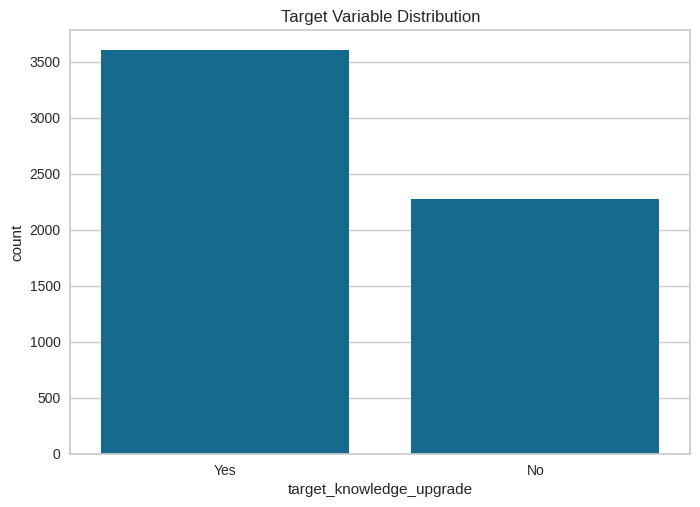

In [137]:
# Class distribution
sns.countplot(x='target_knowledge_upgrade', data=df)
plt.title('Target Variable Distribution')
plt.show()

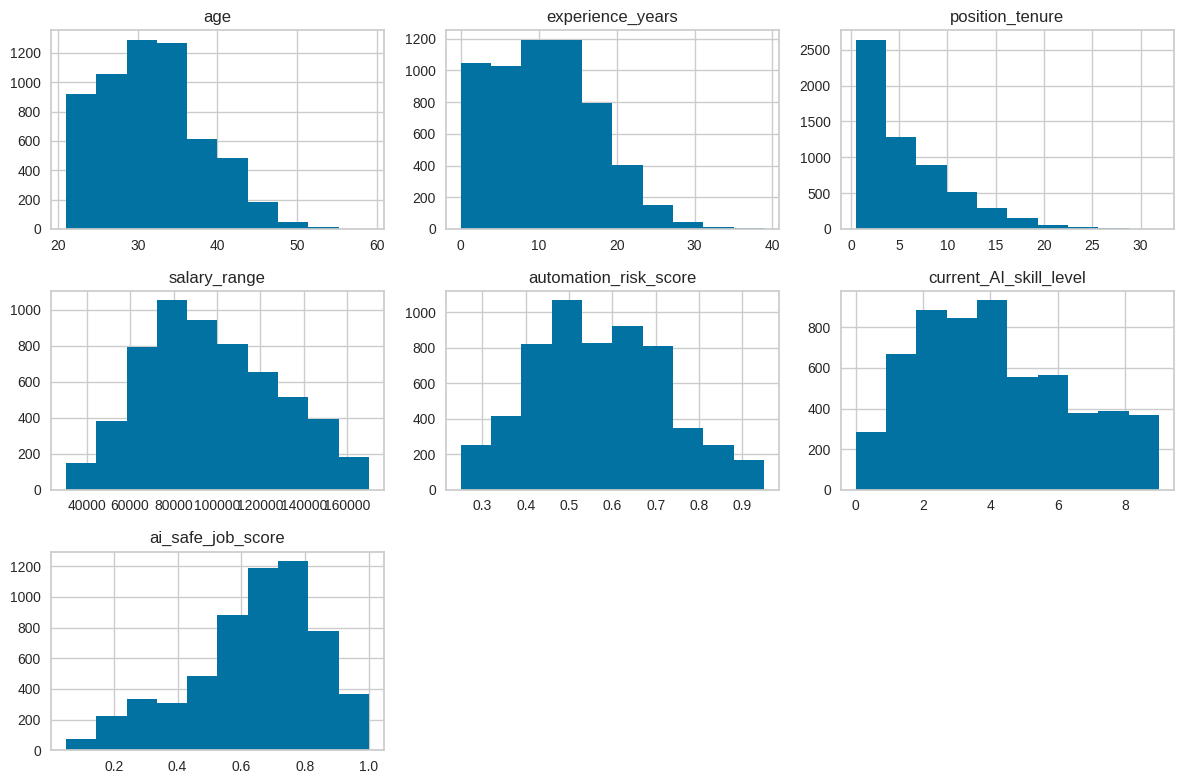

In [138]:
# Numeric feature distribution
num_cols = ['age','experience_years','position_tenure','salary_range','automation_risk_score','current_AI_skill_level','ai_safe_job_score']
df[num_cols].hist(figsize=(12,8))
plt.tight_layout()
plt.show()

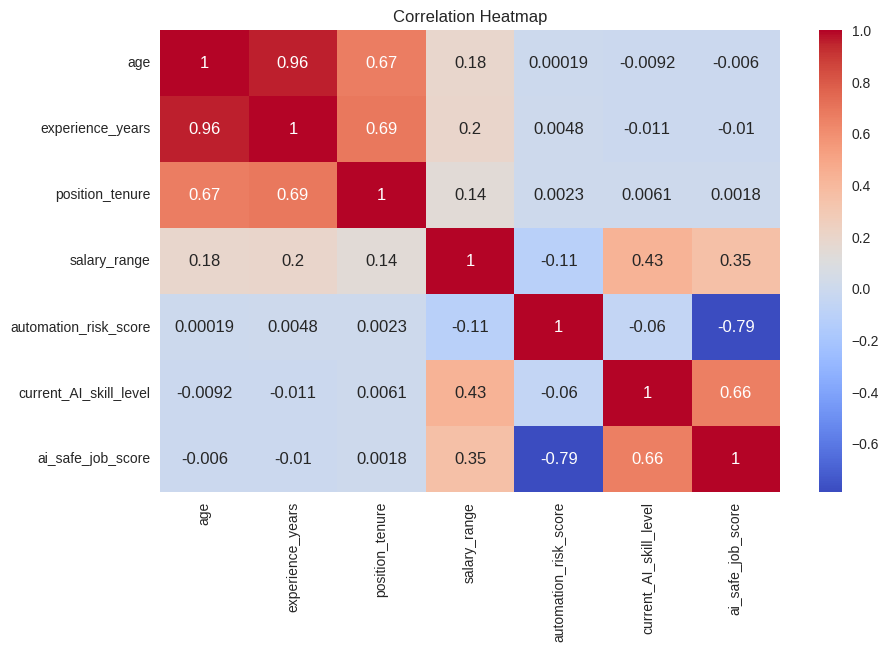

In [139]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

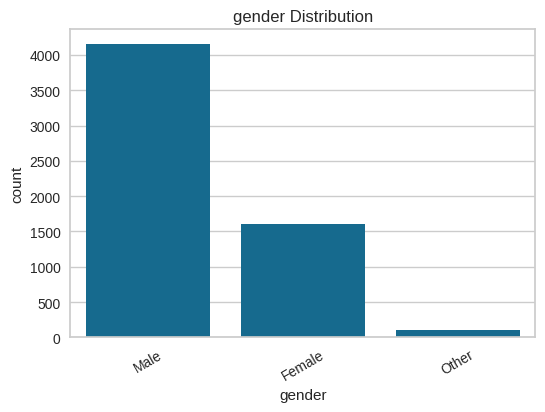

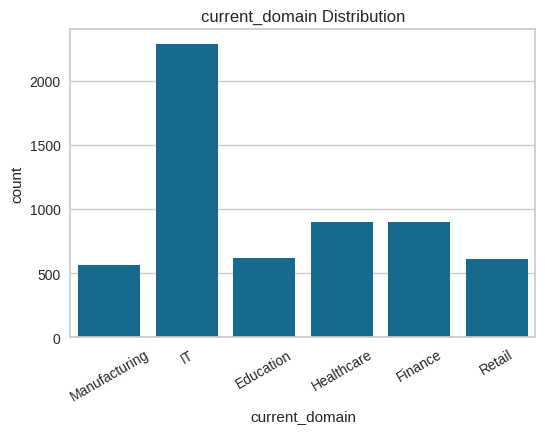

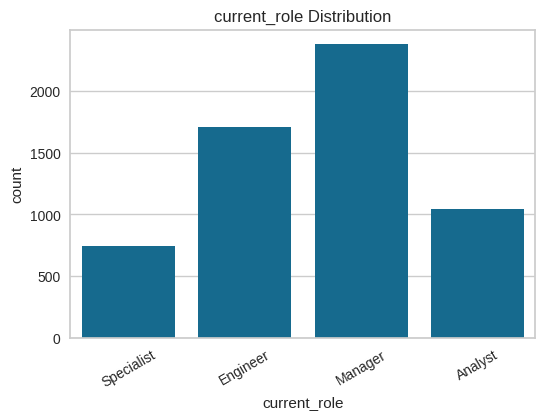

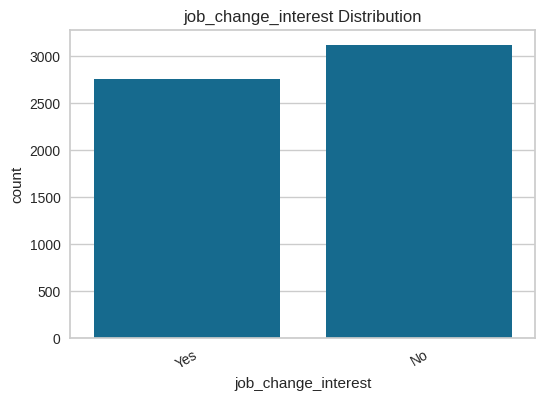

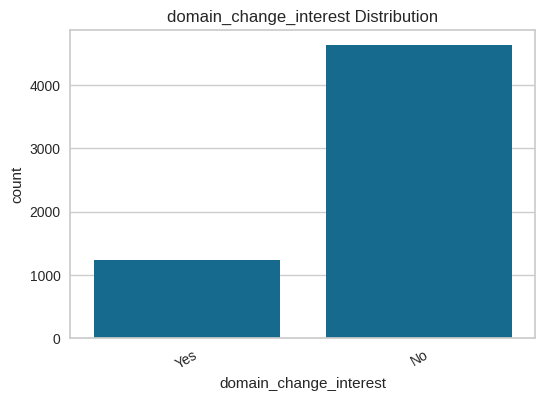

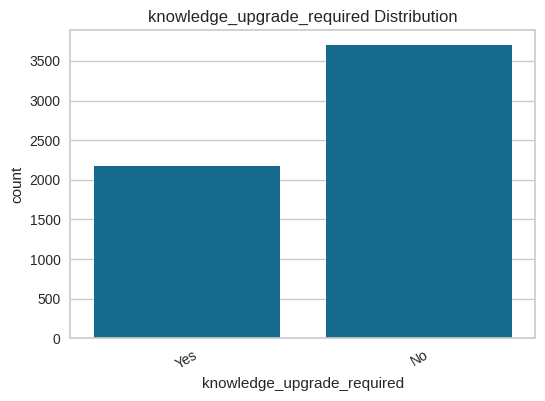

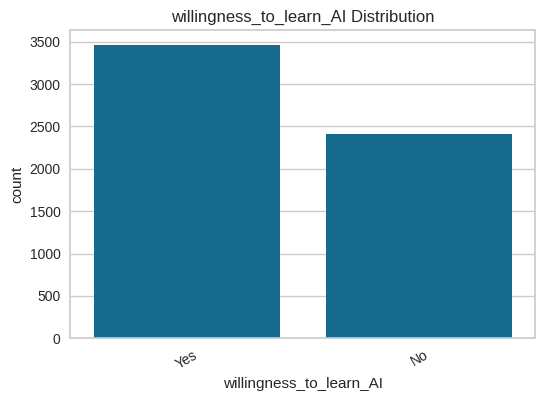

In [140]:
# Categorical feature distribution
cat_cols = ['gender','current_domain','current_role','job_change_interest','domain_change_interest','knowledge_upgrade_required','willingness_to_learn_AI']
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=30)
    plt.show()


In [141]:
target = 'target_knowledge_upgrade'

numeric_cols = ['age', 'experience_years', 'position_tenure', 'salary_range',
                'automation_risk_score', 'current_AI_skill_level', 'ai_safe_job_score']

categorical_cols = ['gender', 'current_domain', 'current_role',
                    'job_change_interest', 'domain_change_interest',
                    'willingness_to_learn_AI']


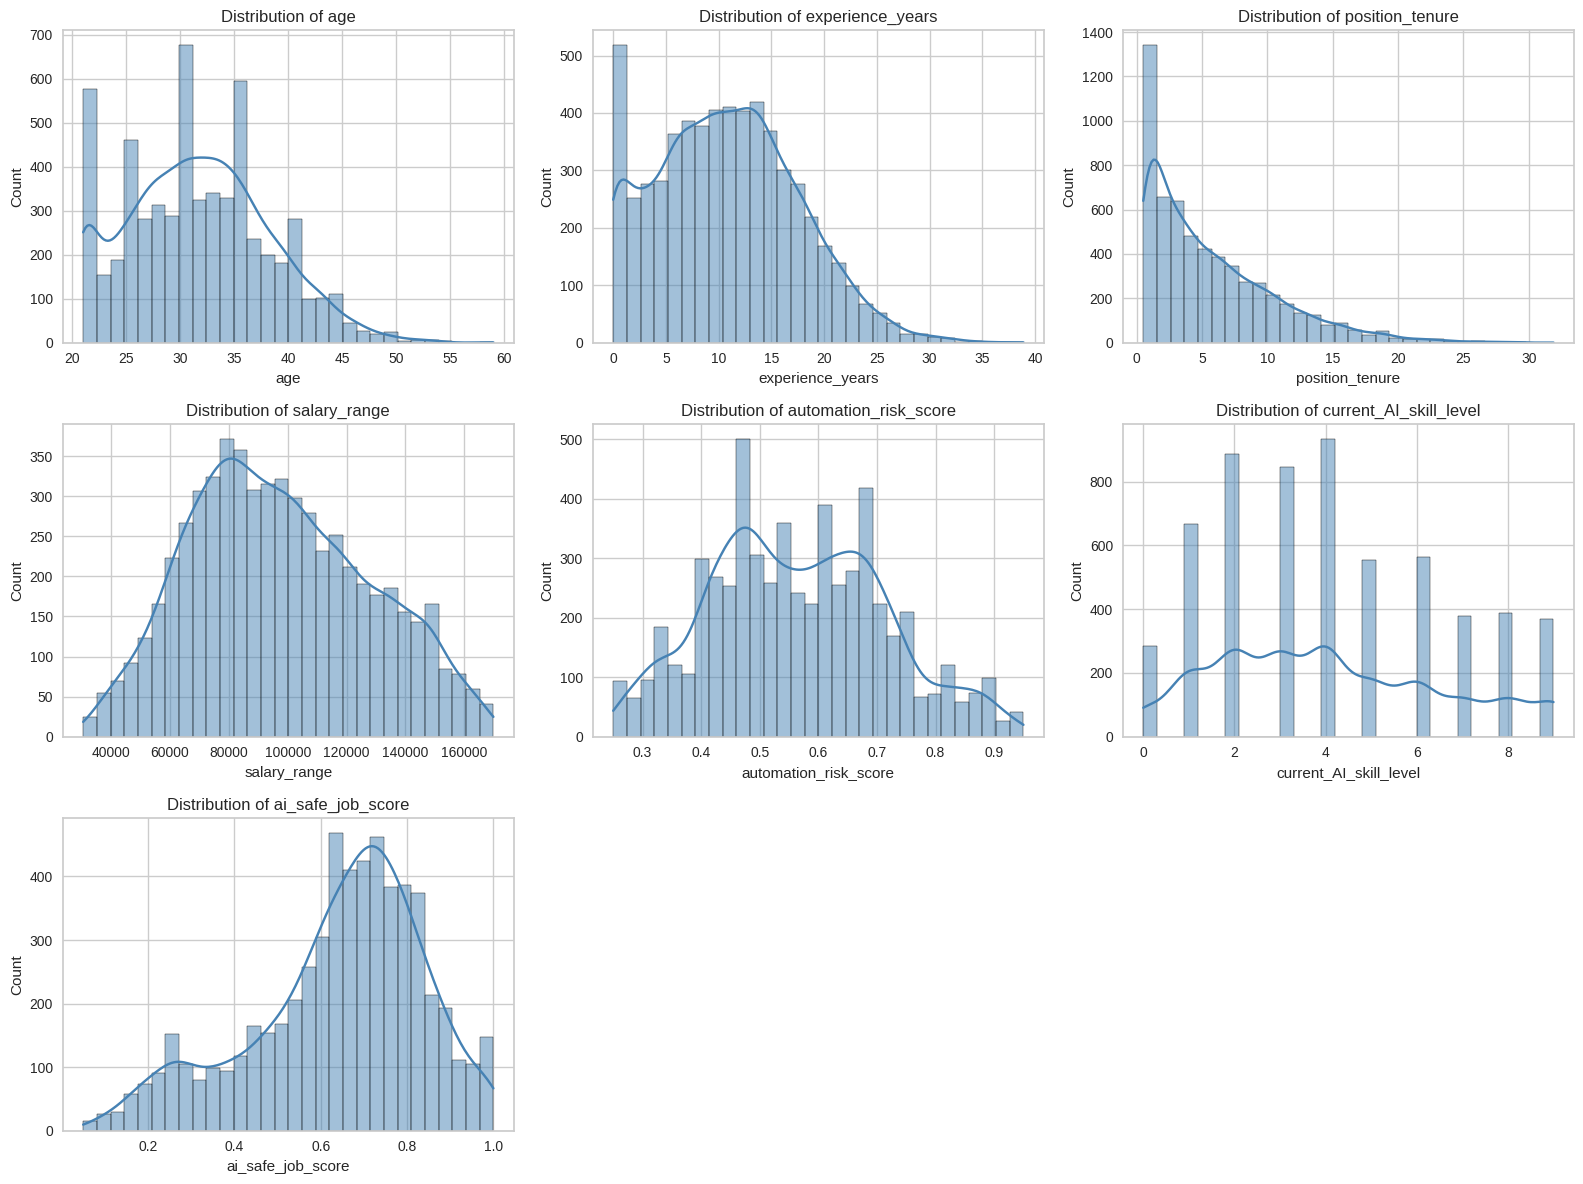

In [142]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


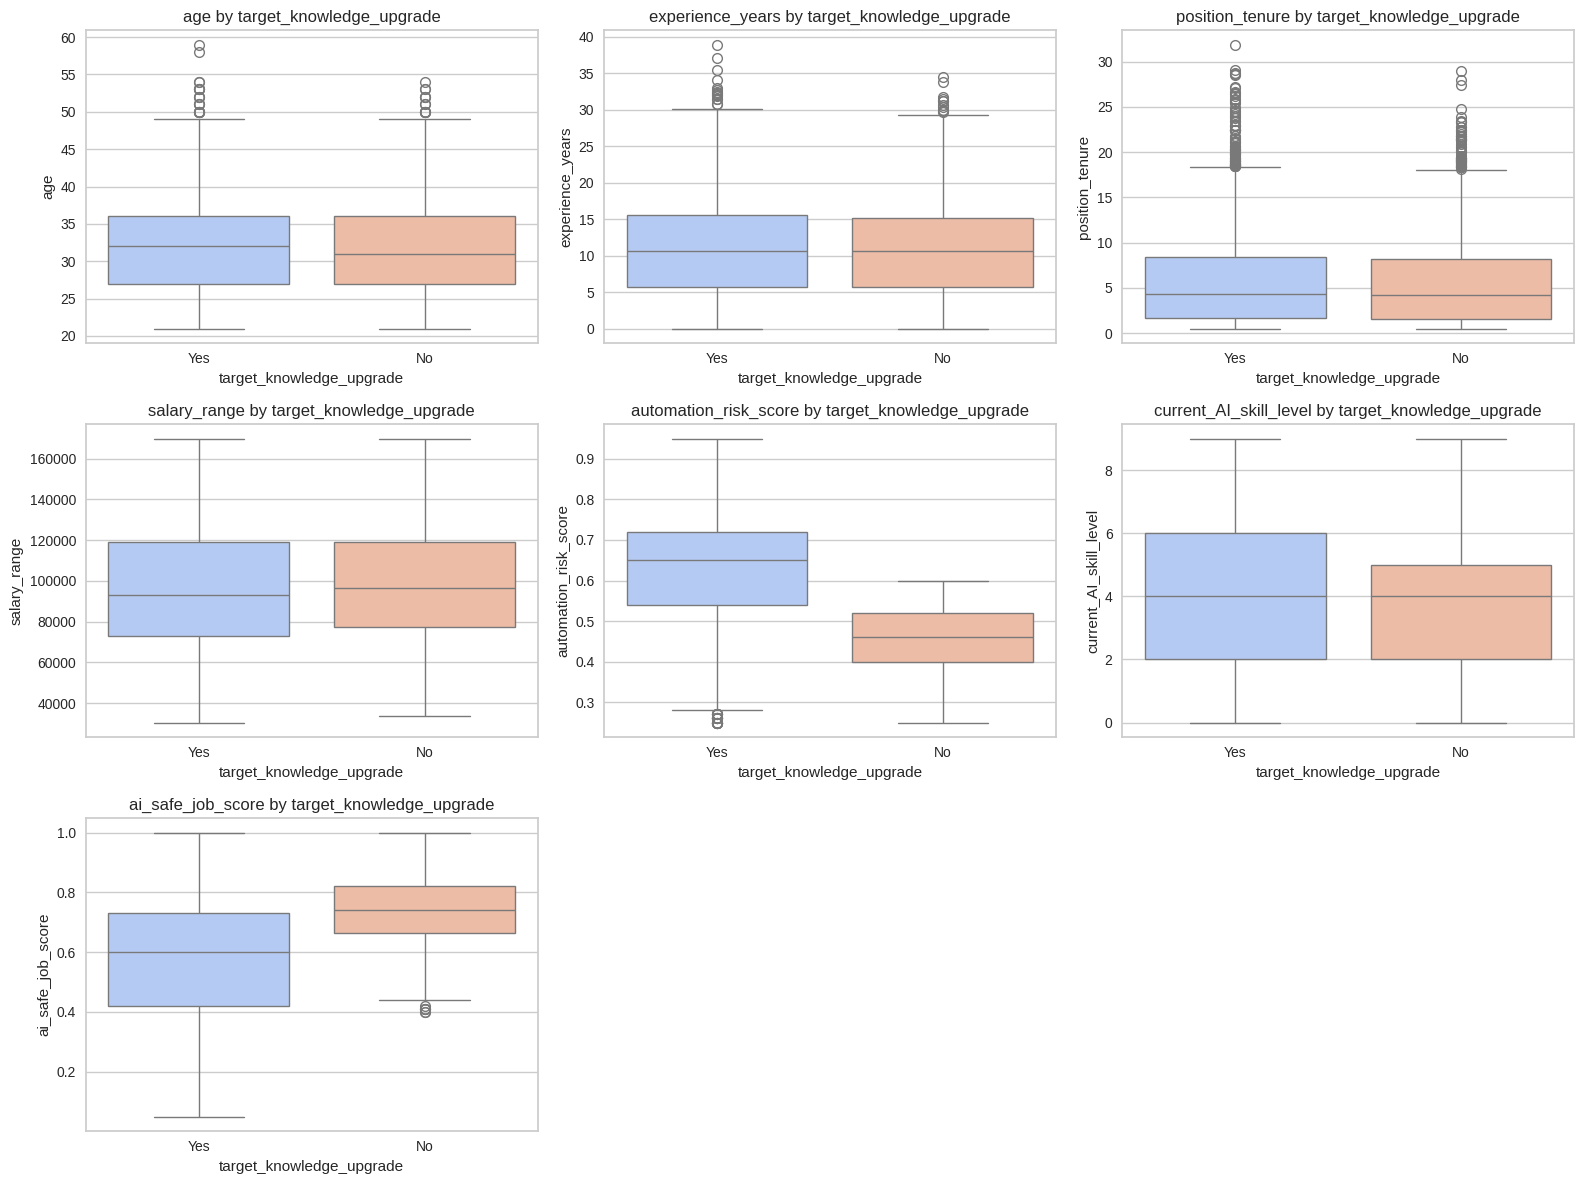

In [143]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=target, y=col, data=df, palette='coolwarm')
    plt.title(f'{col} by {target}')
plt.tight_layout()
plt.show()


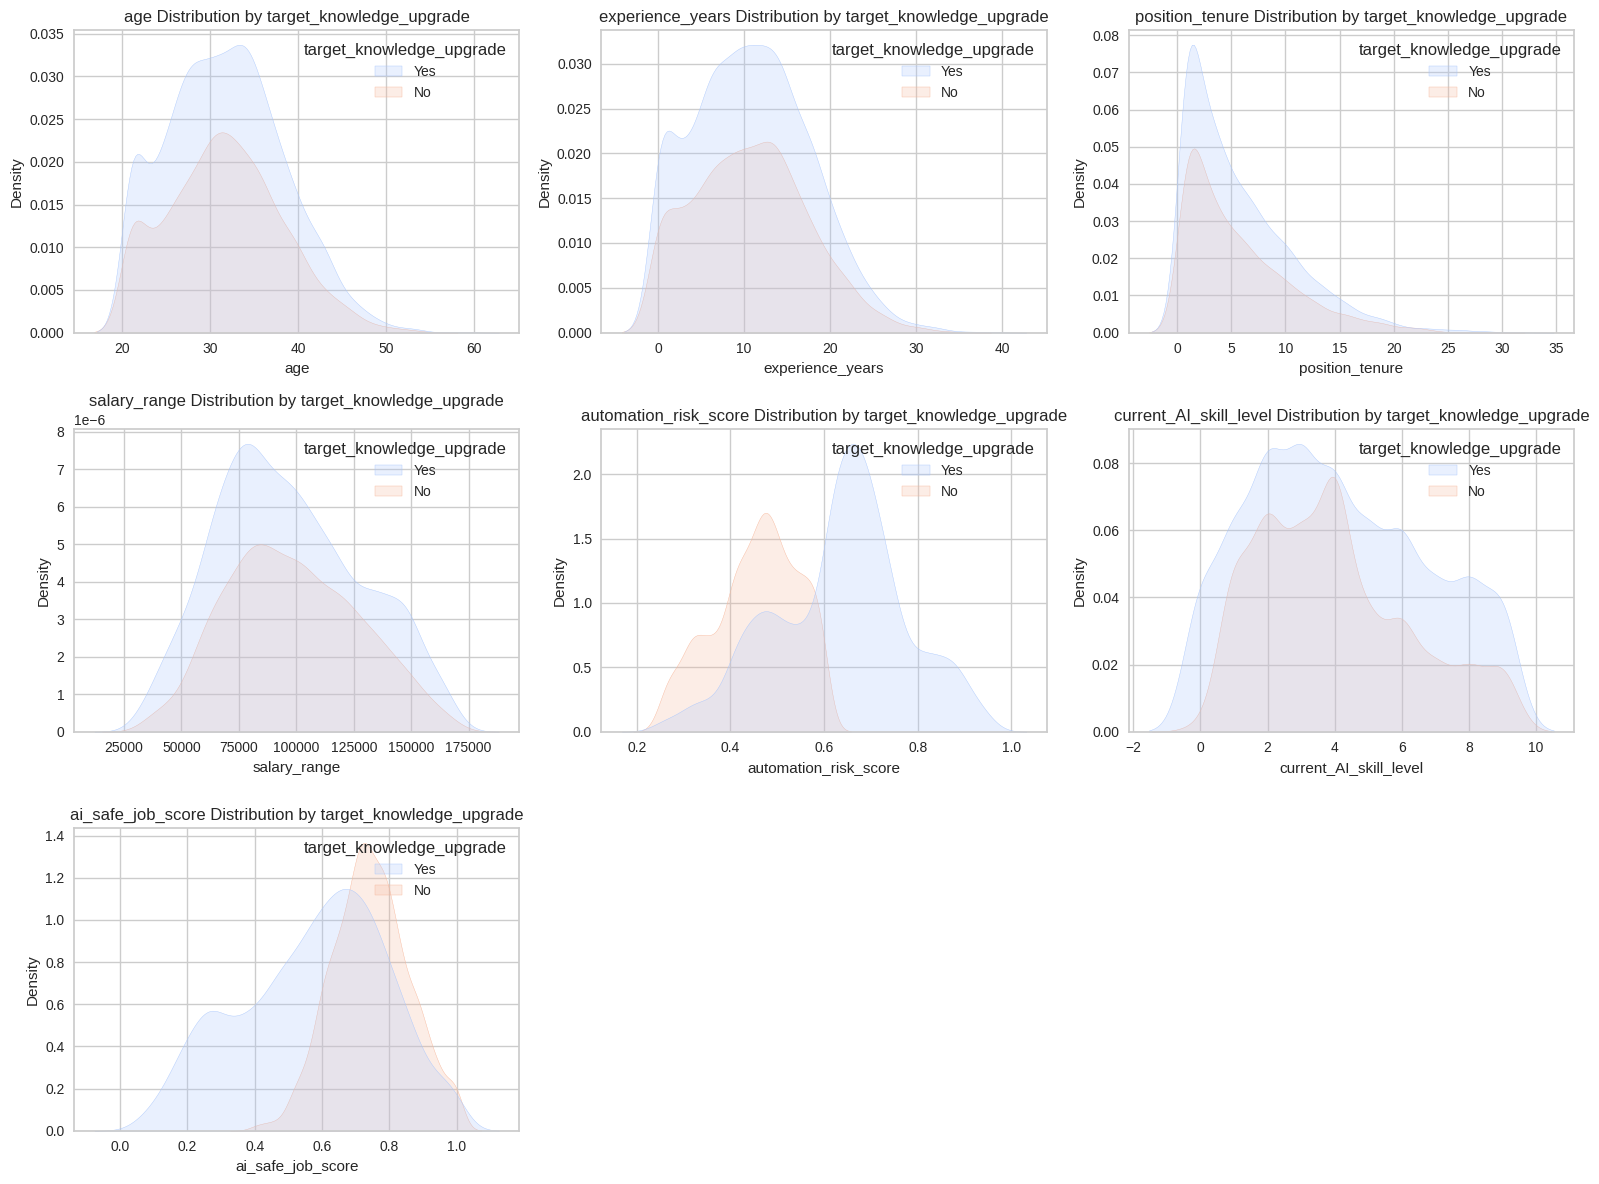

In [144]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data=df, x=col, hue=target, fill=True, palette='coolwarm')
    plt.title(f'{col} Distribution by {target}')
plt.tight_layout()
plt.show()


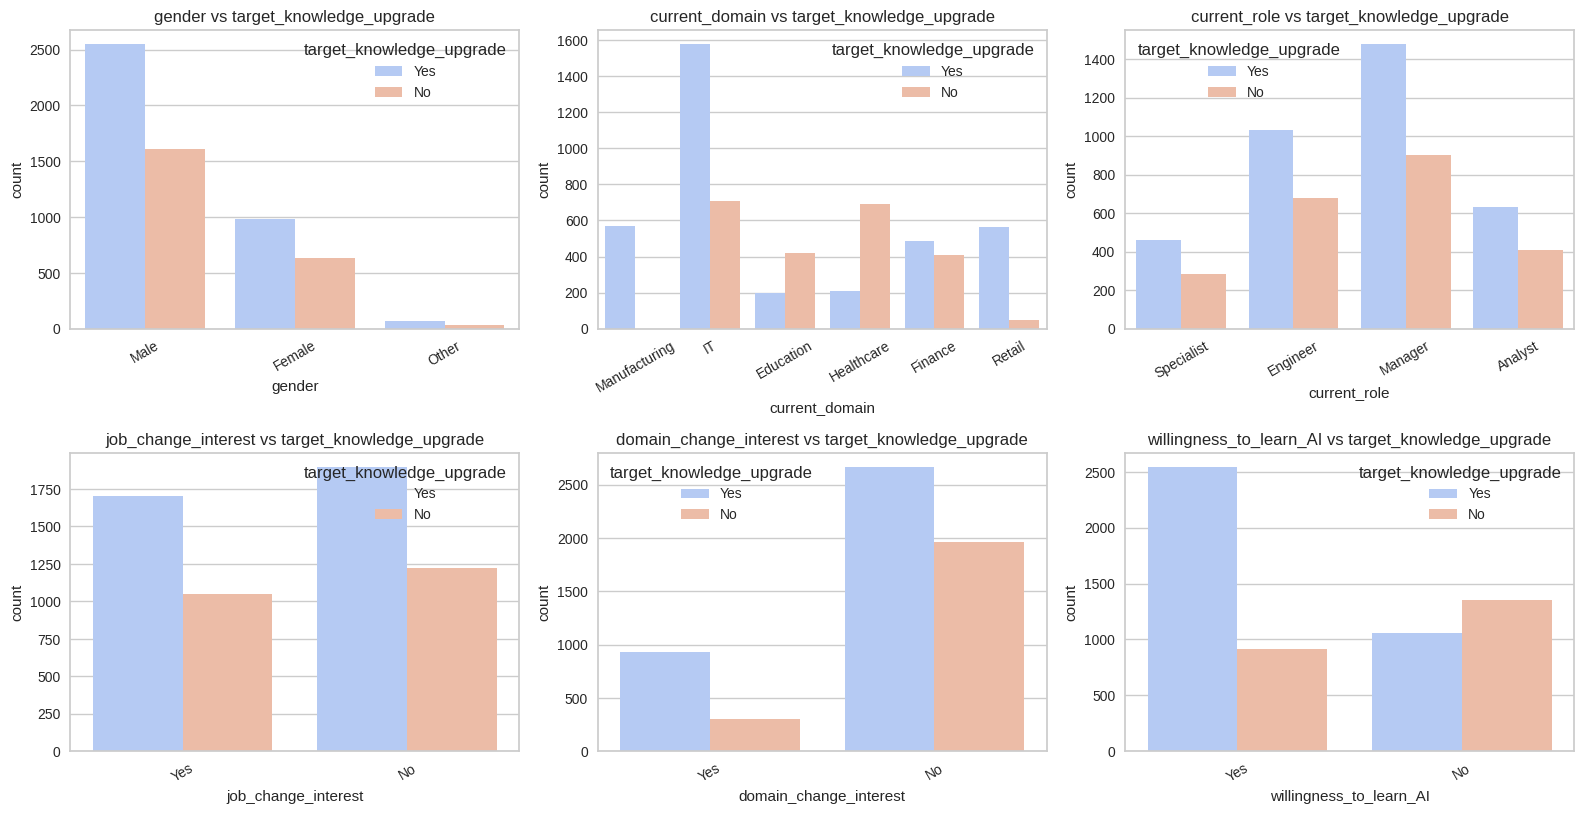

In [145]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue=target, data=df, palette='coolwarm')
    plt.title(f'{col} vs {target}')
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


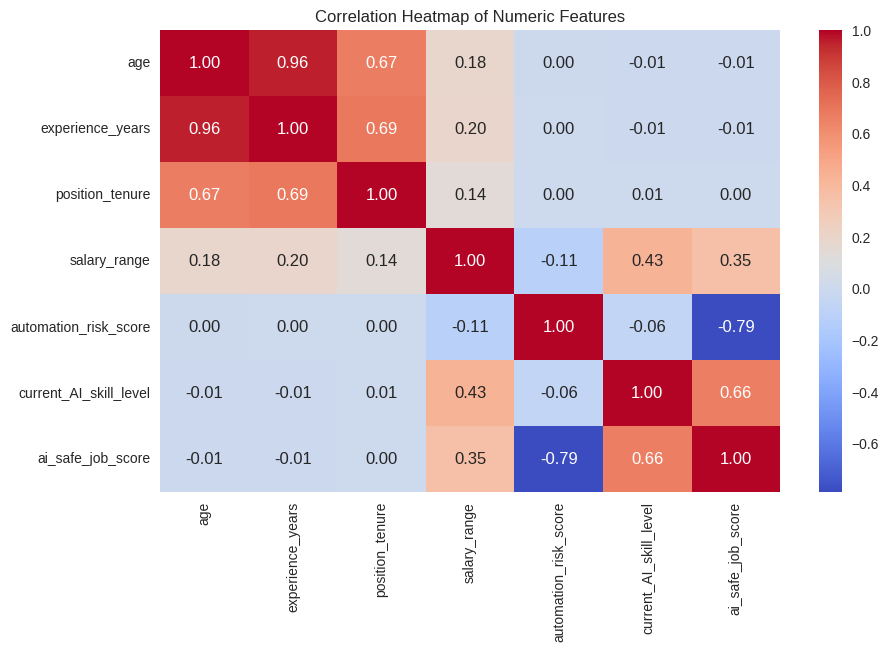

In [146]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


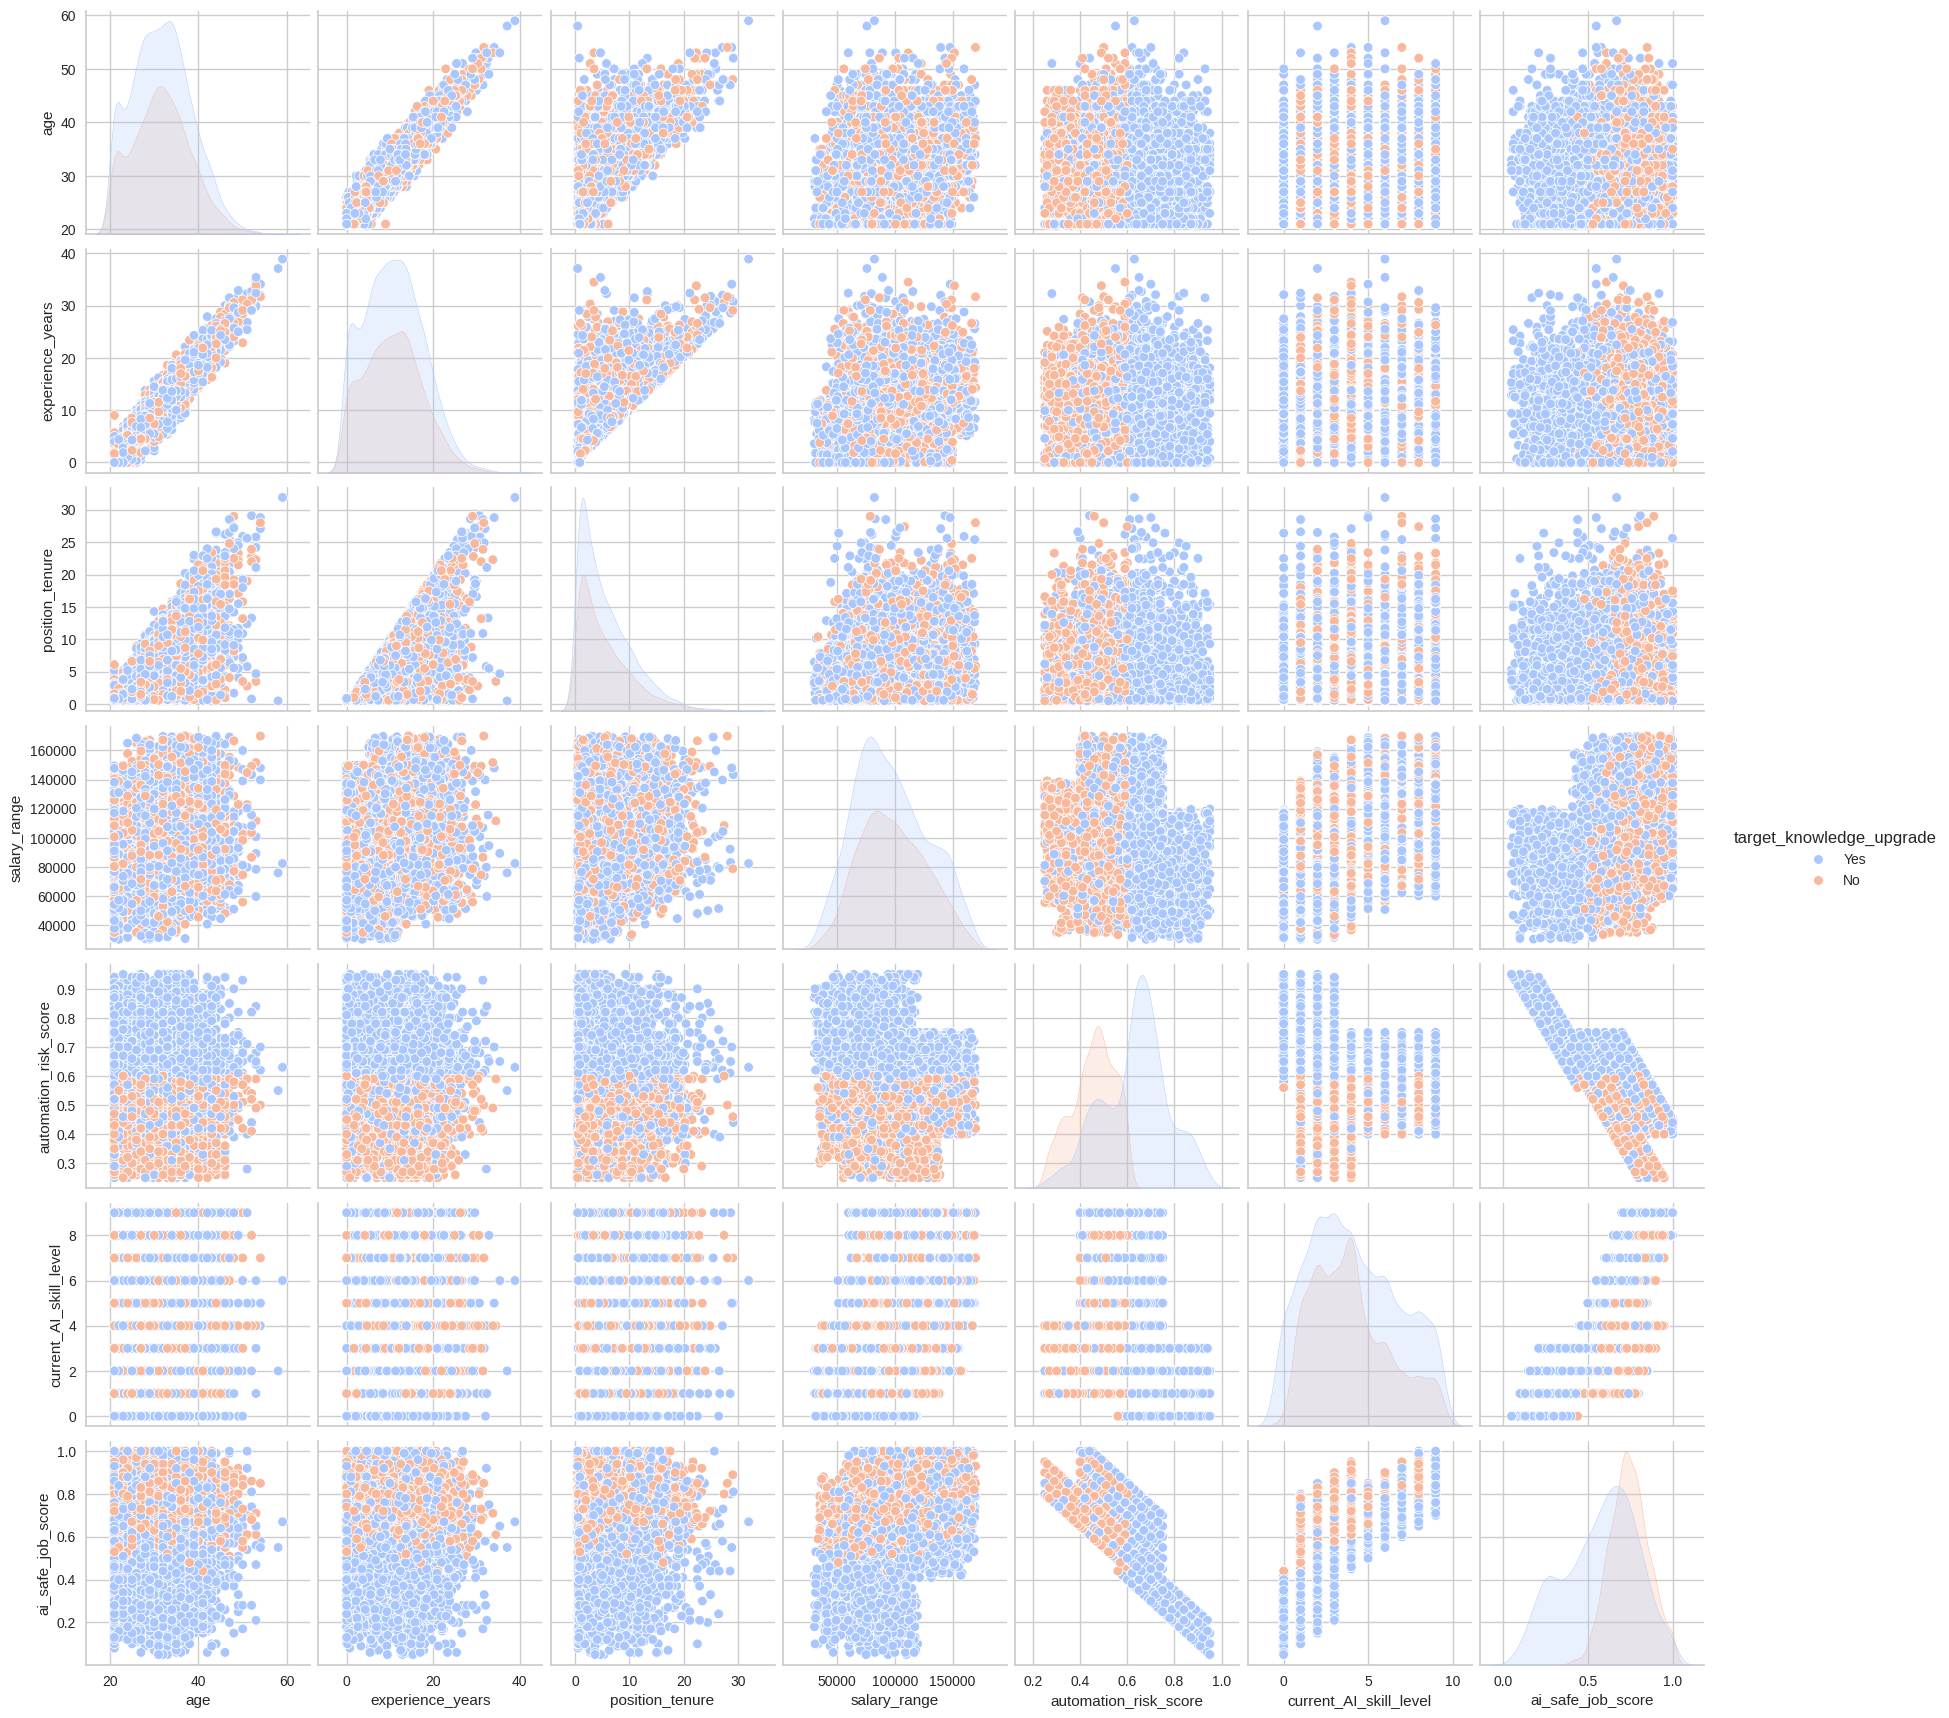

In [147]:
sns.pairplot(df[numeric_cols + [target]], hue=target, palette='coolwarm', diag_kind='kde')
plt.show()


# ======================================
# 📌 SECTION 4: PREPROCESSING
# ======================================

In [148]:
# Encode categorical variables
df_encoded = df.copy()  # making the original dataframe intact , create a df_encoded
le =LabelEncoder() # perform label encoding from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col]) # fit.transform all the categorical columns
df_encoded.head()


age  gender  experience_years  current_domain  position_tenure  \
0   35       1              14.3               4              9.9   
1   31       0              11.9               3              2.4   
2   36       1              12.7               3              9.1   
3   42       1              23.5               0             17.6   
4   30       1               5.9               2              5.3   

   current_role  salary_range  job_change_interest  domain_change_interest  \
0             3         87770                    1                       1   
1             1        132866                    1                       0   
2             2        102774                    0                       0   
3             3         82625                    1                       0   
4             0         91124                    1                       0   

   knowledge_upgrade_required                                         skills  \
0                           1                 PLC Programming, CAD, Robotics   
1                           0                           Cloud, AI/ML, Python   
2                           1                           AI/ML, Python, Cloud   
3                           0                   AI Tools, Teaching, Research   
4                           0  Bioinformatics, Clinical Research, Statistics   

   automation_risk_score  current_AI_skill_level  willingness_to_learn_AI  \
0                   0.61                       2                        1   
1                   0.50                       5                        0   
2                   0.58                       6                        0   
3                   0.39                       1                        1   
4                   0.26                       4                        1   

   ai_safe_job_score target_knowledge_upgrade  
0               0.49                      Yes  
1               0.75                       No  
2               0.72                      Yes  
3               0.66                       No  
4               0.94                       No

In [149]:
# apply the label encoding on the target column 'target_knowledge_upgrade'
df_encoded['target_knowledge_upgrade']=le.fit_transform(df_encoded['target_knowledge_upgrade'])
df_encoded[['target_knowledge_upgrade']].head()

target_knowledge_upgrade
0                         1
1                         0
2                         1
3                         0
4                         0

In [150]:
# since skills columns is present with multiple values , as of know drop the skills column.
df_encoded=df_encoded.drop('skills',axis=1)
df_encoded

age  gender  experience_years  current_domain  position_tenure  \
0      35       1              14.3               4              9.9   
1      31       0              11.9               3              2.4   
2      36       1              12.7               3              9.1   
3      42       1              23.5               0             17.6   
4      30       1               5.9               2              5.3   
...   ...     ...               ...             ...              ...   
5869   29       1               8.5               0              6.6   
5870   27       1               4.5               2              1.5   
5871   33       1               7.8               1              6.8   
5872   34       1              13.6               3              8.2   
5873   25       1               4.3               4              2.3   

      current_role  salary_range  job_change_interest  domain_change_interest  \
0                3         87770                    1                       1   
1                1        132866                    1                       0   
2                2        102774                    0                       0   
3                3         82625                    1                       0   
4                0         91124                    1                       0   
...            ...           ...                  ...                     ...   
5869             1         88082                    0                       0   
5870             1         90530                    0                       0   
5871             0        138206                    0                       0   
5872             2        121967                    1                       0   
5873             0         54703                    0                       1   

      knowledge_upgrade_required  automation_risk_score  \
0                              1                   0.61   
1                              0                   0.50   
2                              1                   0.58   
3                              0                   0.39   
4                              0                   0.26   
...                          ...                    ...   
5869                           0                   0.48   
5870                           0                   0.42   
5871                           0                   0.70   
5872                           1                   0.52   
5873                           1                   0.84   

      current_AI_skill_level  willingness_to_learn_AI  ai_safe_job_score  \
0                          2                        1               0.49   
1                          5                        0               0.75   
2                          6                        0               0.72   
3                          1                        1               0.66   
4                          4                        1               0.94   
...                      ...                      ...                ...   
5869                       4                        0               0.72   
5870                       3                        0               0.73   
5871                       6                        1               0.60   
5872                       6                        1               0.78   
5873                       2                        1               0.26   

      target_knowledge_upgrade  
0                            1  
1                            0  
2                            1  
3                            0  
4                            0  
...                        ...  
5869                         0  
5870                         0  
5871                         1  
5872                         1  
5873                         1  

[5874 rows x 15 columns]

In [151]:
# Features and target
X = df_encoded.drop('target_knowledge_upgrade', axis=1) # all columns except target columns are placed
y = df_encoded['target_knowledge_upgrade']

In [152]:
X

age  gender  experience_years  current_domain  position_tenure  \
0      35       1              14.3               4              9.9   
1      31       0              11.9               3              2.4   
2      36       1              12.7               3              9.1   
3      42       1              23.5               0             17.6   
4      30       1               5.9               2              5.3   
...   ...     ...               ...             ...              ...   
5869   29       1               8.5               0              6.6   
5870   27       1               4.5               2              1.5   
5871   33       1               7.8               1              6.8   
5872   34       1              13.6               3              8.2   
5873   25       1               4.3               4              2.3   

      current_role  salary_range  job_change_interest  domain_change_interest  \
0                3         87770                    1                       1   
1                1        132866                    1                       0   
2                2        102774                    0                       0   
3                3         82625                    1                       0   
4                0         91124                    1                       0   
...            ...           ...                  ...                     ...   
5869             1         88082                    0                       0   
5870             1         90530                    0                       0   
5871             0        138206                    0                       0   
5872             2        121967                    1                       0   
5873             0         54703                    0                       1   

      knowledge_upgrade_required  automation_risk_score  \
0                              1                   0.61   
1                              0                   0.50   
2                              1                   0.58   
3                              0                   0.39   
4                              0                   0.26   
...                          ...                    ...   
5869                           0                   0.48   
5870                           0                   0.42   
5871                           0                   0.70   
5872                           1                   0.52   
5873                           1                   0.84   

      current_AI_skill_level  willingness_to_learn_AI  ai_safe_job_score  
0                          2                        1               0.49  
1                          5                        0               0.75  
2                          6                        0               0.72  
3                          1                        1               0.66  
4                          4                        1               0.94  
...                      ...                      ...                ...  
5869                       4                        0               0.72  
5870                       3                        0               0.73  
5871                       6                        1               0.60  
5872                       6                        1               0.78  
5873                       2                        1               0.26  

[5874 rows x 14 columns]

In [153]:
y


0       1
1       0
2       1
3       0
4       0
       ..
5869    0
5870    0
5871    1
5872    1
5873    1
Name: target_knowledge_upgrade, Length: 5874, dtype: int64

In [155]:
X

age  gender  experience_years  current_domain  position_tenure  \
0      35       1              14.3               4              9.9   
1      31       0              11.9               3              2.4   
2      36       1              12.7               3              9.1   
3      42       1              23.5               0             17.6   
4      30       1               5.9               2              5.3   
...   ...     ...               ...             ...              ...   
5869   29       1               8.5               0              6.6   
5870   27       1               4.5               2              1.5   
5871   33       1               7.8               1              6.8   
5872   34       1              13.6               3              8.2   
5873   25       1               4.3               4              2.3   

      current_role  salary_range  job_change_interest  domain_change_interest  \
0                3         87770                    1                       1   
1                1        132866                    1                       0   
2                2        102774                    0                       0   
3                3         82625                    1                       0   
4                0         91124                    1                       0   
...            ...           ...                  ...                     ...   
5869             1         88082                    0                       0   
5870             1         90530                    0                       0   
5871             0        138206                    0                       0   
5872             2        121967                    1                       0   
5873             0         54703                    0                       1   

      knowledge_upgrade_required  automation_risk_score  \
0                              1                   0.61   
1                              0                   0.50   
2                              1                   0.58   
3                              0                   0.39   
4                              0                   0.26   
...                          ...                    ...   
5869                           0                   0.48   
5870                           0                   0.42   
5871                           0                   0.70   
5872                           1                   0.52   
5873                           1                   0.84   

      current_AI_skill_level  willingness_to_learn_AI  ai_safe_job_score  
0                          2                        1               0.49  
1                          5                        0               0.75  
2                          6                        0               0.72  
3                          1                        1               0.66  
4                          4                        1               0.94  
...                      ...                      ...                ...  
5869                       4                        0               0.72  
5870                       3                        0               0.73  
5871                       6                        1               0.60  
5872                       6                        1               0.78  
5873                       2                        1               0.26  

[5874 rows x 14 columns]

In [156]:
# looking to numeric columns , all data is sparsely distributed
X[num_cols]

age  experience_years  position_tenure  salary_range  \
0      35              14.3              9.9         87770   
1      31              11.9              2.4        132866   
2      36              12.7              9.1        102774   
3      42              23.5             17.6         82625   
4      30               5.9              5.3         91124   
...   ...               ...              ...           ...   
5869   29               8.5              6.6         88082   
5870   27               4.5              1.5         90530   
5871   33               7.8              6.8        138206   
5872   34              13.6              8.2        121967   
5873   25               4.3              2.3         54703   

      automation_risk_score  current_AI_skill_level  ai_safe_job_score  
0                      0.61                       2               0.49  
1                      0.50                       5               0.75  
2                      0.58                       6               0.72  
3                      0.39                       1               0.66  
4                      0.26                       4               0.94  
...                     ...                     ...                ...  
5869                   0.48                       4               0.72  
5870                   0.42                       3               0.73  
5871                   0.70                       6               0.60  
5872                   0.52                       6               0.78  
5873                   0.84                       2               0.26  

[5874 rows x 7 columns]

In [157]:
# apply standard scaler to numeric columns to normalize the numeric values , by Mean = 0 ,Standard deviation = 1
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
X[num_cols]

age  experience_years  position_tenure  salary_range  \
0     0.503992          0.523136         0.854780     -0.315520   
1    -0.104841          0.165713        -0.666661      1.167560   
2     0.656200          0.284854         0.692493      0.177919   
3     1.569448          1.893258         2.416792     -0.484725   
4    -0.257049         -0.727845        -0.078370     -0.205217   
...        ...               ...              ...           ...   
5869 -0.409257         -0.340637         0.185346     -0.305259   
5870 -0.713673         -0.936342        -0.849233     -0.224752   
5871  0.199575         -0.444885         0.225918      1.343178   
5872  0.351784          0.418888         0.509920      0.809123   
5873 -1.018089         -0.966127        -0.686946     -1.403001   

      automation_risk_score  current_AI_skill_level  ai_safe_job_score  
0                  0.300176               -0.832800          -0.740834  
1                 -0.427531                0.369035           0.551595  
2                  0.101710                0.769646           0.402469  
3                 -1.155238               -1.233412           0.104216  
4                 -2.015255               -0.031577           1.496063  
...                     ...                     ...                ...  
5869              -0.559841               -0.031577           0.402469  
5870              -0.956772               -0.432188           0.452178  
5871               0.895573                0.769646          -0.194037  
5872              -0.295221                0.769646           0.700722  
5873               1.821745               -0.832800          -1.884136  

[5874 rows x 7 columns]

In [158]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [159]:
print("Training Shape:", X_train.shape, "Testing Shape:", X_test.shape)

Training Shape: (4699, 14) Testing Shape: (1175, 14)


# ======================================
# 📌 SECTION 5: FEATURE SELECTION
# ======================================

In [160]:


from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [161]:
# ANOVA
anova_selector = SelectKBest(f_classif, k=10)
anova_selector.fit(X_train, y_train)
print("\nTop features by ANOVA:\n", X.columns[anova_selector.get_support()])


Top features by ANOVA:
 Index(['current_domain', 'current_role', 'salary_range', 'job_change_interest',
       'domain_change_interest', 'knowledge_upgrade_required',
       'automation_risk_score', 'current_AI_skill_level',
       'willingness_to_learn_AI', 'ai_safe_job_score'],
      dtype='object')


In [162]:
# Random Forest feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importances:\n", importances)


Feature Importances:
 knowledge_upgrade_required    0.422687
automation_risk_score         0.323183
ai_safe_job_score             0.102330
current_domain                0.048769
current_AI_skill_level        0.025322
willingness_to_learn_AI       0.024807
domain_change_interest        0.011952
salary_range                  0.011412
position_tenure               0.008493
experience_years              0.008366
age                           0.006773
current_role                  0.002575
gender                        0.002002
job_change_interest           0.001331
dtype: float64


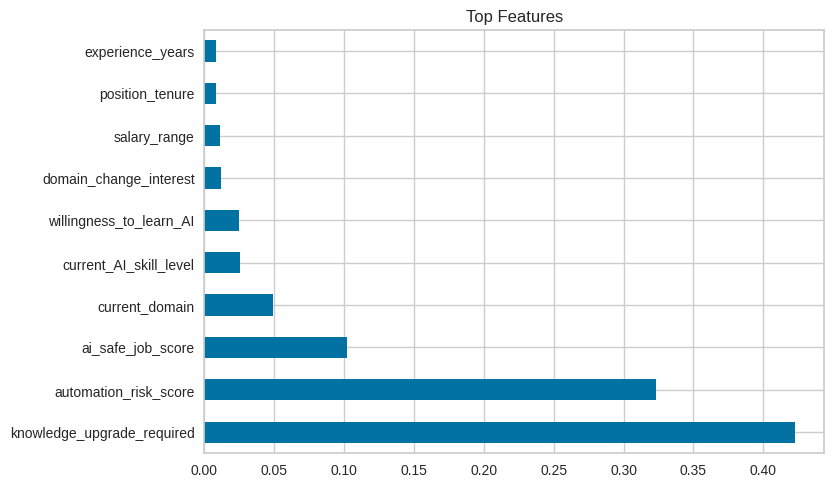

In [163]:
# Plot feature importances
importances.head(10).plot(kind='barh', title='Top Features')
plt.show()

In [164]:
# VIF Calculation
X_vif = X_train.copy()
X_vif['Intercept'] = 1
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print("\nVIF Values:\n", vif_data.sort_values(by="VIF", ascending=False))



VIF Values:
                        Feature          VIF
13           ai_safe_job_score  5226.112172
10       automation_risk_score  2929.982764
11      current_AI_skill_level  2050.543156
14                   Intercept    15.385562
2             experience_years    13.688254
0                          age    11.999462
4              position_tenure     1.915093
5                 current_role     1.833220
3               current_domain     1.535798
6                 salary_range     1.332400
9   knowledge_upgrade_required     1.149045
8       domain_change_interest     1.113983
12     willingness_to_learn_AI     1.109043
7          job_change_interest     1.029336
1                       gender     1.002877


# ======================================
# 📌 SECTION 6: MODEL BUILDING
# ======================================

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [166]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}


In [167]:
model_results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    f1 = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
    auc = roc_auc_score(y_test, y_prob)

    model_results.append([name, acc, f1, auc])
    print(f"\n{name} Performance:")
    print("Accuracy:", acc)
    print("F1 Score:", f1)
    print("ROC AUC:", auc)


Logistic Regression Performance:
Accuracy: 0.9872340425531915
F1 Score: 0.9872367436202745
ROC AUC: 0.9994968923901906

Decision Tree Performance:
Accuracy: 1.0
F1 Score: 1.0
ROC AUC: 1.0

Random Forest Performance:
Accuracy: 1.0
F1 Score: 1.0
ROC AUC: 1.0

Gradient Boosting Performance:
Accuracy: 1.0
F1 Score: 1.0
ROC AUC: 1.0

SVM Performance:
Accuracy: 0.985531914893617
F1 Score: 0.9855225822579439
ROC AUC: 0.9992422708559578

KNN Performance:
Accuracy: 0.931063829787234
F1 Score: 0.9311634603377719
ROC AUC: 0.9750731653444753


# ======================================
# 📌 SECTION 7: MODEL COMPARISON TABLE
# ======================================


Model Comparison:
                  Model  Accuracy  F1 Score   ROC AUC
0  Logistic Regression  0.987234  0.987237  0.999497
1        Decision Tree  1.000000  1.000000  1.000000
2        Random Forest  1.000000  1.000000  1.000000
3    Gradient Boosting  1.000000  1.000000  1.000000
4                  SVM  0.985532  0.985523  0.999242
5                  KNN  0.931064  0.931163  0.975073


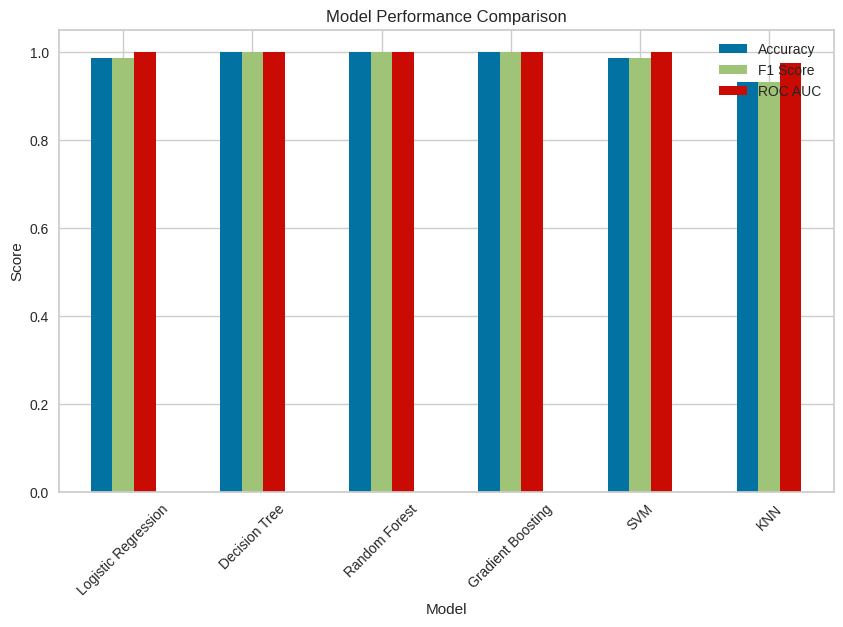

In [168]:
results_df = pd.DataFrame(model_results, columns=['Model','Accuracy','F1 Score','ROC AUC'])
print("\nModel Comparison:\n", results_df)

# Plot comparison
results_df.set_index('Model').plot(kind='bar', figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

# ======================================
# 📌 SECTION 8: HYPERPARAMETER TUNING (Random Forest Example)
# ======================================

In [169]:
from sklearn.model_selection import GridSearchCV

In [170]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}


In [171]:
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("\nBest Params for Random Forest:", grid.best_params_)
print("Best Accuracy from CV:", grid.best_score_)


Best Params for Random Forest: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy from CV: 1.0


# ======================================
# 📌 SECTION 9: EVALUATION OF BEST MODEL
# ======================================

In [172]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:,1]

print("\nClassification Report for Best Model:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


Classification Report for Best Model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       449
           1       1.00      1.00      1.00       726

    accuracy                           1.00      1175
   macro avg       1.00      1.00      1.00      1175
weighted avg       1.00      1.00      1.00      1175

Confusion Matrix:
 [[449   0]
 [  0 726]]
ROC AUC Score: 1.0


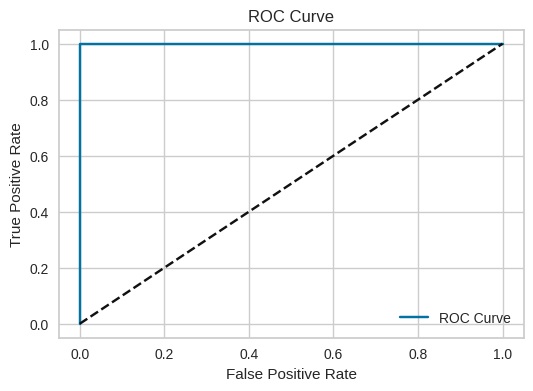

In [173]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# ======================================
# 📌 SECTION 10: CONCLUSION
# ======================================

In [174]:
"""
## Key Findings:
- Models like Random Forest and Gradient Boosting generally perform best.
- Important features include: automation_risk_score, ai_safe_job_score, willingness_to_learn_AI.
- Higher automation risk and low AI skill increase the likelihood of needing an upgrade.
"""

'\n## Key Findings:\n- Models like Random Forest and Gradient Boosting generally perform best.\n- Important features include: automation_risk_score, ai_safe_job_score, willingness_to_learn_AI.\n- Higher automation risk and low AI skill increase the likelihood of needing an upgrade.\n'

# ======================================
# 📌 SECTION 11: AUTOML WITH PyCaret
# ======================================

In [175]:
!pip install pycaret

In [176]:
from pycaret.classification import *

In [177]:
# Setup PyCaret for classification
pycaret_setup = setup(data=df_encoded,
                      target='target_knowledge_upgrade',
                      session_id=42,
                      normalize=True,
                      train_size=0.8)


In [178]:
# Compare all models
best_model_pycaret = compare_models(sort='Accuracy')

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [179]:
# Display best model
print("Best model from PyCaret:")
print(best_model_pycaret)

Best model from PyCaret:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=42, splitter='best')


In [180]:
# Evaluate the best model visually
evaluate_model(best_model_pycaret)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [181]:
# Finalize and predict on test set
final_model = finalize_model(best_model_pycaret)
predictions = predict_model(final_model)

In [182]:
# predicting with new DataFrame

# Example new data point (same features as X)
new_data = pd.DataFrame([{
    'age': 35,
    'gender': 1,  # Assume encoded
    'experience_years': 10,
    'current_domain': 2,  # Encoded
    'position_tenure': 4,
    'current_role': 1,
    'salary_range': 90000,
    'job_change_interest': 0,
    'domain_change_interest': 0,
    'knowledge_upgrade_required': 1,
    'automation_risk_score': 0.65,
    'current_AI_skill_level': 3,
    'willingness_to_learn_AI': 1,
    'ai_safe_job_score': 0.45
}])

# Scale numeric features
new_data[num_cols] = scaler.transform(new_data[num_cols])

# Predict
pred_label = best_model.predict(new_data)[0]
pred_proba = best_model.predict_proba(new_data)[0][1]

print(f"\nPrediction: {'Yes' if pred_label==1 else 'No'} (Prob: {pred_proba:.2f})")



Prediction: Yes (Prob: 0.97)
